The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dict_keys(['t', 'y', 'sol', 't_events', 'y_events', 'nfev', 'njev', 'nlu', 'status', 'message', 'success'])
final velocity: 2322.784711554852 m/s
final altitude: 60674.44727031757 m
final forward distance: 94220.98458405396 m


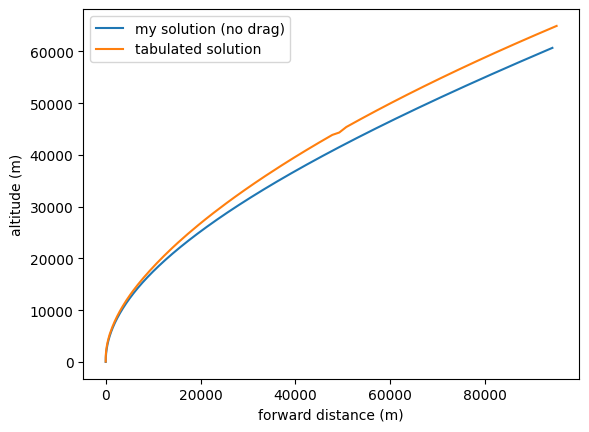

In [7]:
%reset -f
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
import scipy

p1 = 0.866
p2 = 2.665e-5
p3 = 2.378
thrust = 35.1e6
total_rocket_mass = 2.97e6
specific_impulse = 283
radius_earth = 6371e3 #km
gsl = 9.81
dat = np.loadtxt('traj.dat')
fuel_mass = 2.14e6
end_time = fuel_mass / (thrust / (gsl * specific_impulse))

def trajec(t, y0):

    minit, zinit, xinit, vinit = y0

    C = gsl * specific_impulse
    mdot = thrust / C
    g = gsl * (radius_earth/(radius_earth + zinit))**2
    theta = p1 * np.arctan(p2 * t**(p3))
    D = 0

    dmdt = -mdot
    dzdt = vinit*np.cos(theta)
    dxdt = vinit*np.sin(theta)
    dvdt = ((thrust - D) / minit) - g*np.cos(theta)

    return dmdt, dzdt, dxdt, dvdt

# end_time = 150

tspan = [0,end_time]
y0 = [total_rocket_mass, 0, 0, 0]

ans = scipy.integrate.solve_ivp(trajec, tspan, y0, t_eval=np.linspace(0,end_time,1000))

print(ans.keys())

G = ans['y']

msol = ans['y'][0,:]
zsol = ans['y'][1,:]
xsol = ans['y'][2,:]
vsol = ans['y'][3,:]

print(f"final velocity: {vsol[-1]} m/s")
print(f"final altitude: {zsol[-1]} m")
print(f"final forward distance: {xsol[-1]} m")

plt.plot(xsol,zsol,label='my solution (no drag)')
plt.plot(dat[:,0],dat[:,1],label='tabulated solution')
plt.xlabel('forward distance (m)')
plt.ylabel('altitude (m)')
plt.legend()
plt.show()

